<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Medical_Insurance_Cost_Prediction_ML_Project_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#importing the data
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [8]:
sns.set()

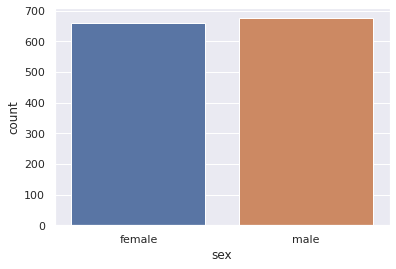

In [9]:
sns.countplot(insurance_data['sex'])
plt.show()

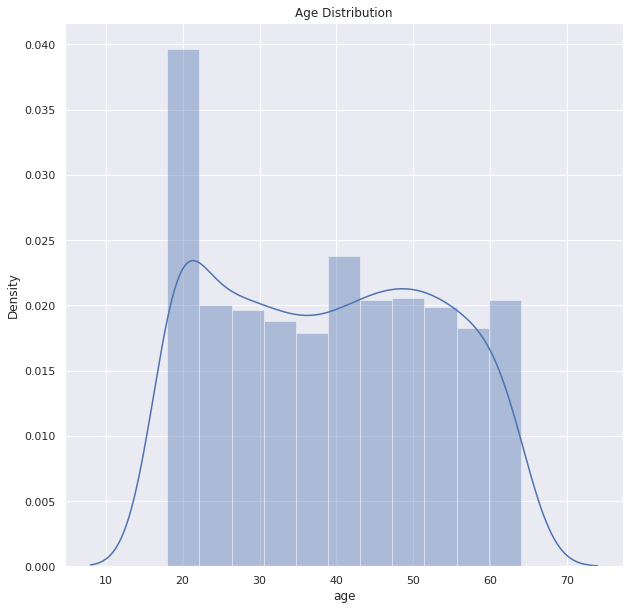

In [10]:
plt.figure(figsize = (10,10))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

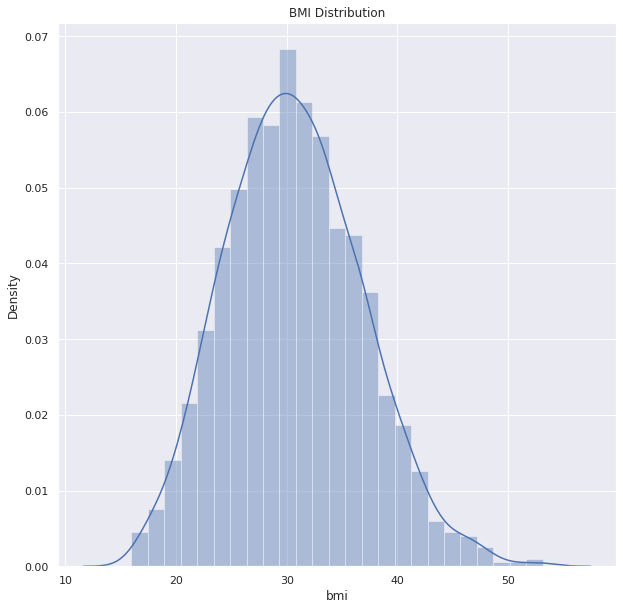

In [11]:
plt.figure(figsize = (10,10))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range is 14.5 ---> 24.9

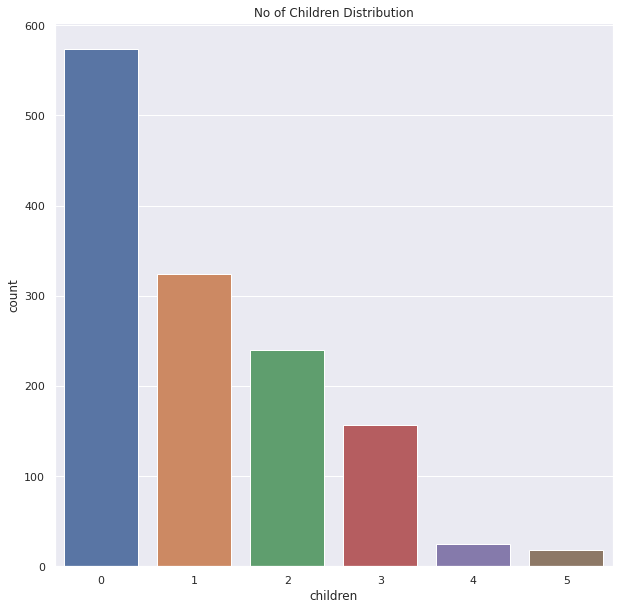

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(insurance_data['children'])
plt.title('No of Children Distribution')
plt.show()

In [13]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

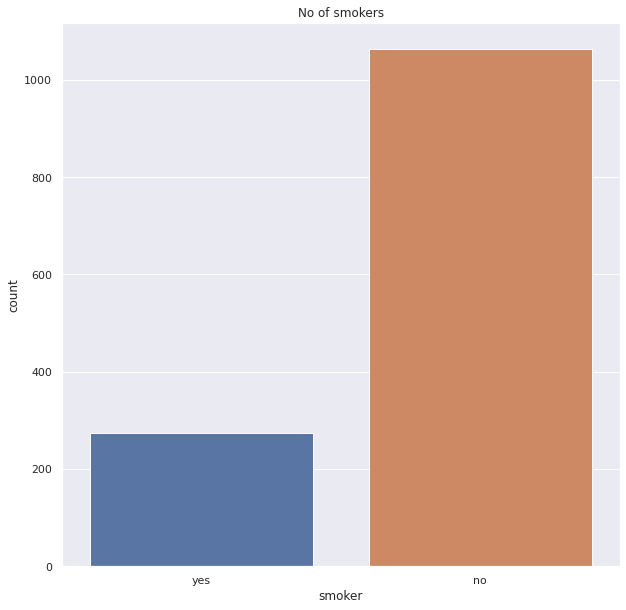

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(insurance_data['smoker'])
plt.title('No of smokers')
plt.show()

In [15]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

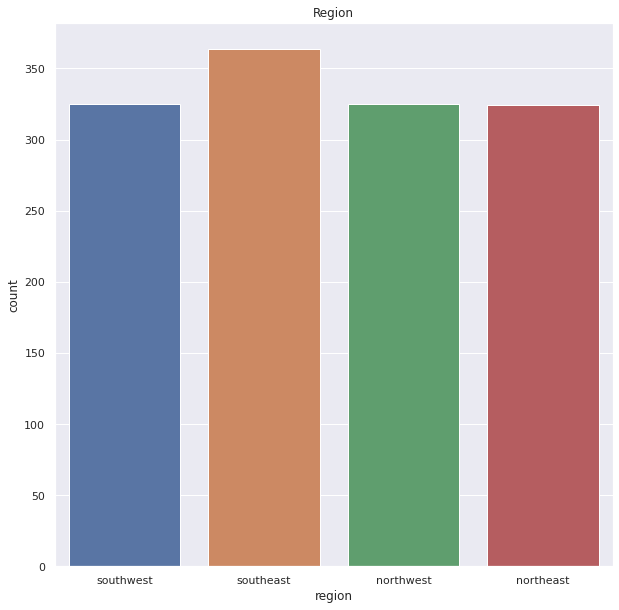

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(insurance_data['region'])
plt.title('Region')
plt.show()

In [17]:
insurance_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

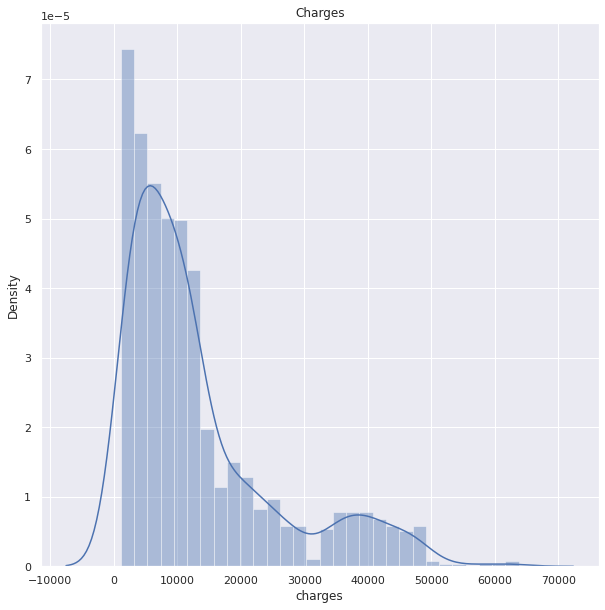

In [18]:
plt.figure(figsize = (10,10))
sns.distplot(insurance_data['charges'])
plt.title('Charges')
plt.show()

Data Preprocessing

Encoding the categorical features

In [19]:
insurance_data.replace({'sex':{'female':0,'male':1}},inplace = True)

insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace = True)

insurance_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}}, inplace = True)

In [20]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [21]:
X = insurance_data.drop('charges', axis = 1)
Y = insurance_data['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [25]:
#splitting into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)
print(X.shape,Y.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1338, 6) (1338,) (1070, 6) (268, 6) (1070,) (268,)


In [26]:
#model training
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#prediction on training data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#Rsquared
score_1 = metrics.r2_score(Y_train,train_pred)
score_2 = metrics.r2_score(Y_test,test_pred)

print('Score on training data:',score_1)
print('Score on testing data:', score_2)

Score on training data: 0.7519923667088932
Score on testing data: 0.7445422986536503


In [33]:
#Building a predictive system

input_data = (31,0,25.74,0,0,1)

numpy_data = np.asarray(input_data)

reshaped_data = numpy_data.reshape(1,-1)

prediction = model.predict(reshaped_data)

#print(prediction)

print('The Insurance Cost is USD:',prediction)


The Insurance Cost is USD: [3911.4481614]
